In [17]:
#library to read data
import pandas as pd

In [18]:
#reading the data from csv using pandas
pima = pd.read_csv('diabetes.csv')

In [19]:
#viewing first 5 rows of data
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
#column names too big,changing 
pima.columns =['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
#defining x-->features/independent inputs-->all columns except last
x=pima.iloc[:,0:-1]
x.shape

(768, 8)

In [22]:
#defining y-->tarhet/dependent-->last column
y=pima.iloc[:,-1]
y.shape

(768,)

In [23]:
#splitting data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [24]:
#model to use-logistic regression since binary outputs
#importing model
from sklearn.linear_model import LogisticRegression

In [25]:
#creating an instance for the model
lr=LogisticRegression()

In [26]:
#fitting the tarining data
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#prediction for the testing set
y_pred=lr.predict(x_test)

In [28]:
#finding accuracy of the model
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8072916666666666


In [29]:
#examine class distribution of testing set-->how many 1's ,0's
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [30]:
#0's are in majority
#finding null accuracy-->accuracy achieved by simply predicting most frequest class(in this case 0)
#below method for binary classification
max(y_test.mean(), 1 - y_test.mean())
#null accuracy for multi-class classification problems
#y_test.value_counts().head(1) / len(y_test)

0.6770833333333333

In [31]:
#confusion matrix
confusion=metrics.confusion_matrix(y_test, y_pred)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[119  11]
 [ 26  36]]


In [32]:
#metrics deducted from confusion matrix

In [33]:
#classification accuracy--> how often model is predicting correctly
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.8072916666666666
0.8072916666666666


In [43]:
#classification Error-->how often model is predicting wrongly
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
#1-accurcy
print(1 - metrics.accuracy_score(y_test, y_pred))

0.19270833333333334
0.19270833333333337


In [44]:
#sensitivity(recall)--->how often model is predicting 1 when actual value is 1
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.5806451612903226
0.5806451612903226


In [45]:
#specificity-->how often model is predicting 0 when actual value is 0
specificity = TN / (TN + FP)
print(specificity)

0.9153846153846154


In [55]:
#False positive rate-->how often model is predicting 1 when actual value is 0
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.08461538461538462
0.08461538461538465


In [56]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred))

0.7659574468085106
0.7659574468085106


Text(0, 0.5, 'Frequency')

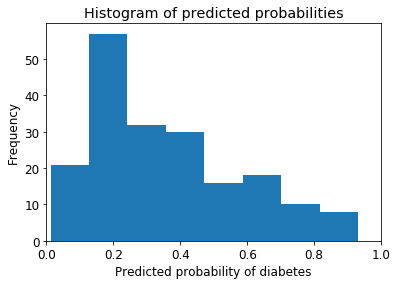

In [57]:
#understanding the class distribution of predicted probabilities using histogram
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

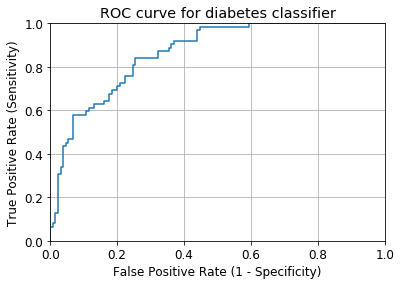

In [58]:
#ROC curves-->useful to see how sensitivity and specificity change with thresholds without actually changing thresholds
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
y_pred_prob = lr.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [59]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [60]:
evaluate_threshold(0.5)

Sensitivity: 0.5806451612903226
Specificity: 0.9307692307692308


In [61]:
evaluate_threshold(0.3)

Sensitivity: 0.8709677419354839
Specificity: 0.676923076923077


In [62]:
#AUC curve
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8641439205955335
